In [33]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

from IPython.display import SVG

In [34]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

Plotting Closing Price and volume of stocks

In [35]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,138.634292,135.861220,137.221693,137.317244,9.018199e+07,136.878479
std,11.299526,11.218026,11.169486,11.301170,2.894923e+07,11.468316
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870
25%,128.392498,126.237499,127.735001,127.319998,6.957448e+07,126.944252
50%,136.349998,133.625000,135.535004,134.854996,8.563055e+07,134.188515
75%,148.424999,145.832497,147.002495,146.897499,1.048884e+08,146.591103
max,170.300003,164.529999,167.479996,165.300003,1.925415e+08,165.300003


<AxesSubplot:xlabel='Date'>

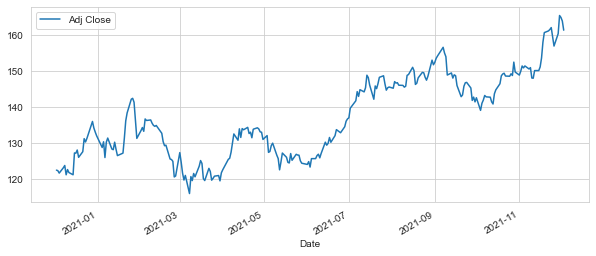

In [36]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


<AxesSubplot:xlabel='Date'>

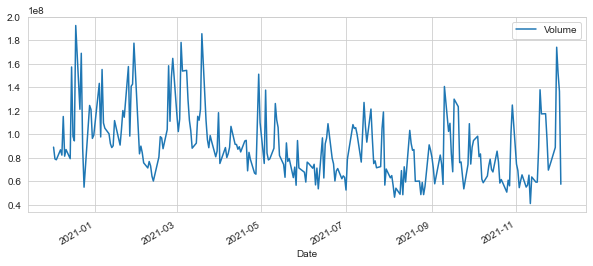

In [37]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Plotting Moving Averages:

In [38]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

Plotting all moving averages

<AxesSubplot:xlabel='Date'>

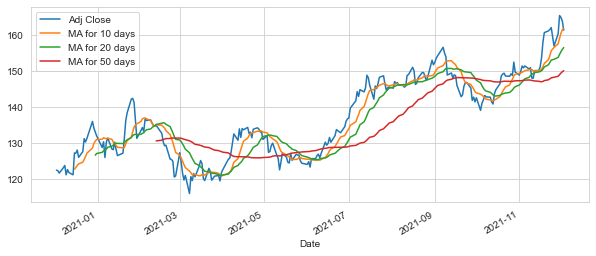

In [39]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

Analysing Daily Returns - analysing the risk 

<AxesSubplot:xlabel='Date'>

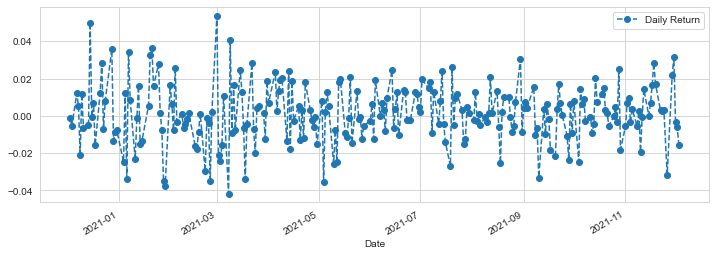

In [40]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')


C:\Users\manya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

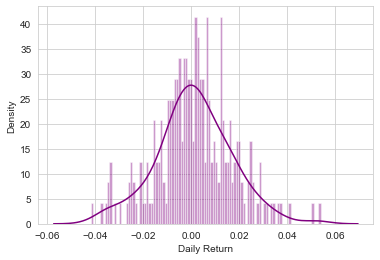

In [41]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [42]:
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-12-02,122.325897,1827.949951,213.579712,3203.530029
2020-12-03,122.186745,1826.770020,212.459106,3186.729980
2020-12-04,121.500977,1827.989990,212.578094,3162.580078
2020-12-07,122.991783,1819.479980,212.508682,3158.000000
2020-12-08,123.617928,1818.550049,214.214386,3177.290039


C:\Users\manya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


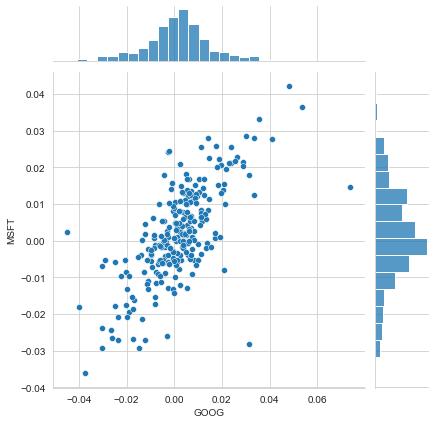

In [43]:
tech_rets = closing_df.pct_change()
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

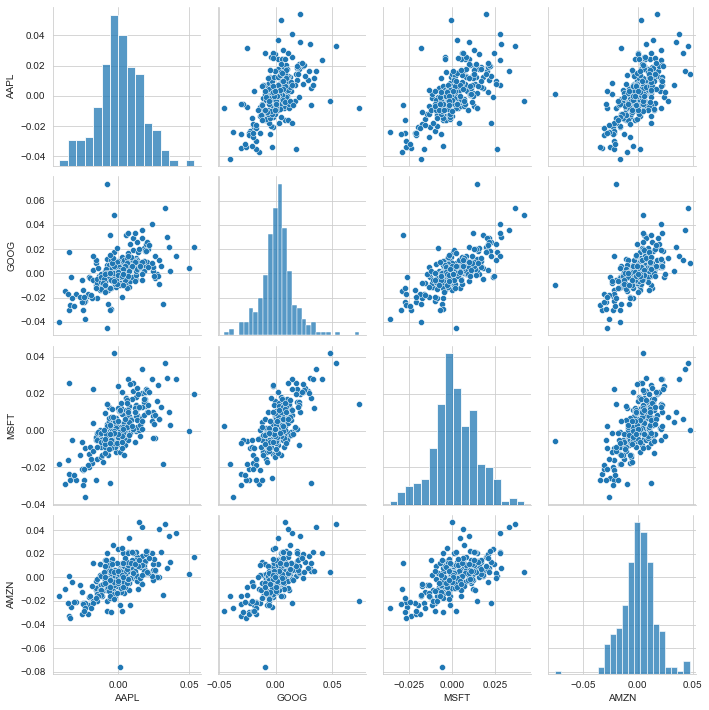

In [44]:
sns.pairplot(tech_rets.dropna())

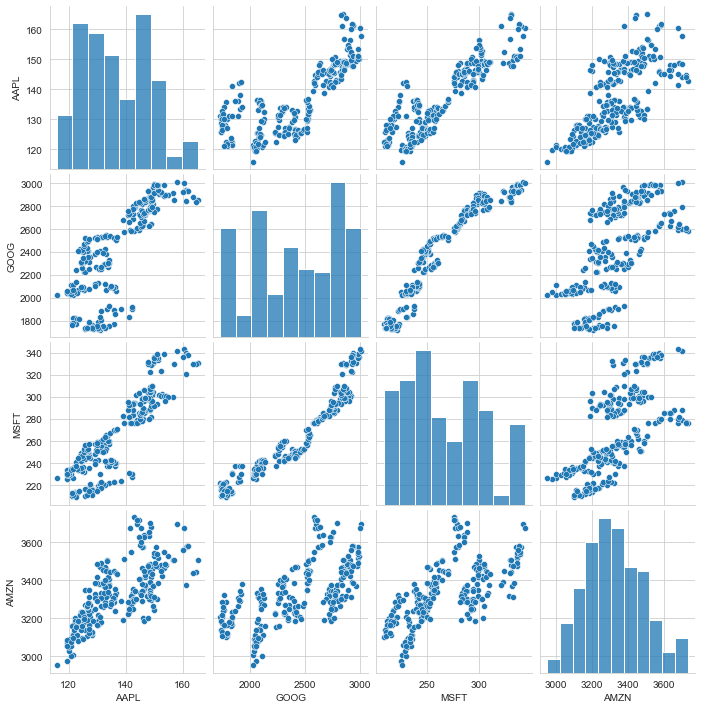

In [45]:
sns.pairplot(closing_df)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

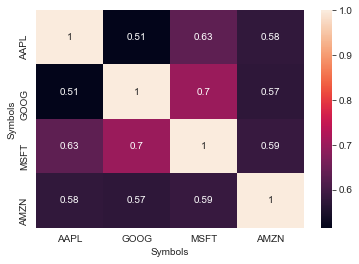

In [49]:
sns.heatmap(data = tech_rets.corr(), annot=True)

Risk Analysis::
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

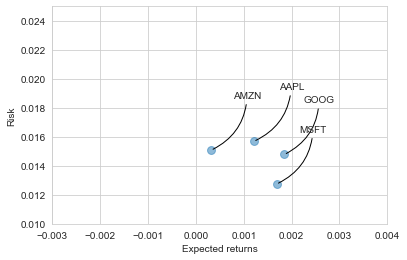

In [53]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color = 'black'))

C:\Users\manya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

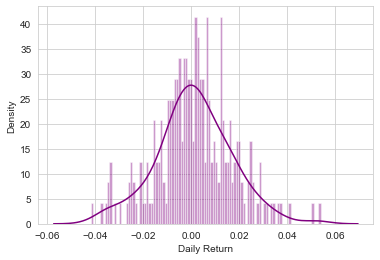

In [54]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Risk value for the stock.

In [56]:
rets['AAPL'].quantile(0.05)

-0.02516353701227725

Value at Risk using the Monte Carlo method

The stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

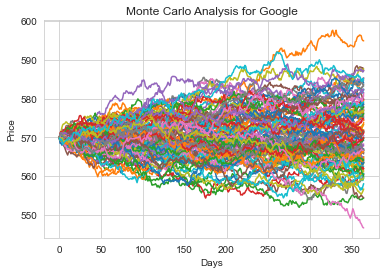

In [60]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Plotting histogram for larger runs

In [62]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

1


Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

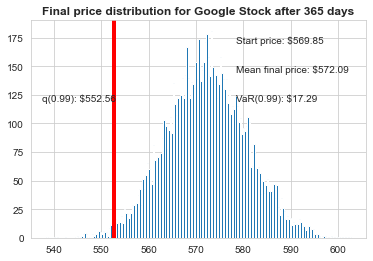

In [74]:
# Now we'lll define q as the x% empirical qunatile, this basically means that 99% of the values should fall between here
x = int(input())
q = np.percentile(simulations, x)
y = str((100-x)/100)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 91% confidence interval)
plt.figtext(0.6, 0.6, "VaR("+y+"): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q("+y+"): $%.2f" % q)

# Plot a line at the 9% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

This basically menas for every initial stock you purchase your putting about $VaR at risk y% of the time from our Monte Carlo Simulation.